# Итоговая работа.

In [4]:
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import minimize
%matplotlib inline

## Задание 1

Дана матрица рейтингов фильмов (строки - пользователи (10 человек), столбцы - фильмы (15 фильмов))

In [5]:
raitings = np.array([[ 4,  4,  9,  4,  1,  6, 10,  7,  9,  6,  9,  2,  8,  6,  6],
                     [ 9,  2,  5, 10,  7,  8, 10,  5,  6,  2,  1,  6,  8,  9,  7],
                     [ 1,  6,  8,  8,  4,  9,  3,  8, 10,  5,  2,  6,  8,  1,  6],
                     [ 6,  1,  9,  7,  7,  9,  2,  3,  5,  1,  6,  6,  3,  2,  7],
                     [ 3,  7,  3,  5,  7,  9,  9,  6,  2,  9,  1,  2,  8, 10,  6],
                     [ 8,  3,  7,  3,  8,  6,  1,  8,  8,  6,  1,  9,  4, 10,  1],
                     [ 9,  8,  4,  8,  8, 10,  6,  1,  1,  2,  9,  5,  2,  7,  2],
                     [ 4,  1,  6,  4,  3, 10,  4,  4,  2,  8,  7,  9,  3,  8,  3],
                     [ 2,  7,  7,  6, 10,  6,  8,  9,  8,  6, 10,  1,  7, 10,  4],
                     [ 5, 10,  8,  8,  9,  7,  2,  9,  9, 10,  8,  8,  8,  6, 10]])

**a)** Необходимо найти наиболее похожего пользователя по косинусной метрике для каждого из (ответ: 10 пар вида (x, y), где y - наиболее похожий пользователь на пользователя x).

In [7]:
def cosine(x, y):
    xLength = np.linalg.norm(x)
    yLength = np.linalg.norm(y)
    return np.dot(x,y) / ( xLength * yLength)

In [28]:
list_u = []
for ind_u, raiting_u in enumerate(raitings):
    list_u.append([])
    list_u[ind_u].append(ind_u)
    list_b = []

    for ind_b, raiting_b in enumerate(raitings):

        if ind_u != ind_b:
            cos = cosine(raitings[ind_u], raitings[ind_b])
        else:
            cos = 0
        list_b.append(cos)
    
    list_u[ind_u].append(list_b.index(max(list_b)))
    list_u[ind_u].append(max(list_b))

list_u   

[[0, 8, 0.9106598233573044],
 [1, 4, 0.8713805223930228],
 [2, 9, 0.9187305147356807],
 [3, 9, 0.8588686958710952],
 [4, 8, 0.8794847716076252],
 [5, 9, 0.8551490764118892],
 [6, 3, 0.832742107055763],
 [7, 5, 0.8445168512565341],
 [8, 0, 0.9106598233573044],
 [9, 2, 0.9187305147356807]]

In [31]:
for i,j in enumerate(list_u):
    print(f'Наиболее похожим для пользователя {(i+1)} является пользователь {j[1]+1} с косинусным расстоянием {round(j[2], 2)}')

Наиболее похожим для пользователя 1 является пользователь 9 с косинусным расстоянием 0.91
Наиболее похожим для пользователя 2 является пользователь 5 с косинусным расстоянием 0.87
Наиболее похожим для пользователя 3 является пользователь 10 с косинусным расстоянием 0.92
Наиболее похожим для пользователя 4 является пользователь 10 с косинусным расстоянием 0.86
Наиболее похожим для пользователя 5 является пользователь 9 с косинусным расстоянием 0.88
Наиболее похожим для пользователя 6 является пользователь 10 с косинусным расстоянием 0.86
Наиболее похожим для пользователя 7 является пользователь 4 с косинусным расстоянием 0.83
Наиболее похожим для пользователя 8 является пользователь 6 с косинусным расстоянием 0.84
Наиболее похожим для пользователя 9 является пользователь 1 с косинусным расстоянием 0.91
Наиболее похожим для пользователя 10 является пользователь 3 с косинусным расстоянием 0.92


**b)** Предположим, вы захотели сжать признаковые описания пользователя с 15 фильмов, до, скажем, 5-ти признаков, как вы это сделаете?

In [33]:
from sklearn.decomposition import PCA

model = PCA(n_components=5) 
transf_matrix = model.fit_transform(raitings)

transf_matrix

array([[-5.30986101,  1.92919845, -4.93300027,  2.70188013,  5.50497886],
       [ 2.87763403,  2.71659559,  1.40592782,  7.26325751, -4.50322291],
       [-4.94010408, -6.68861167, -0.94550184,  3.61556661, -0.68969272],
       [ 5.14939908, -6.28027284, -4.65978558,  1.09024004, -1.01471112],
       [-1.37488691,  7.54357985,  4.00834369,  2.1284001 , -0.16324949],
       [ 2.65341956, -3.77075601,  8.58430748, -1.46628319,  1.67401769],
       [ 8.61573944,  3.78603335, -4.02721027, -4.37582577, -3.13880277],
       [ 5.39658258, -1.0170466 ,  1.01456742, -1.89512837,  6.54883538],
       [-5.7843488 ,  5.29857107, -1.48083611, -3.71295542,  0.21312695],
       [-7.2835739 , -3.51729118,  1.03318766, -5.34915166, -4.43127987]])

## Задание 2


Вычислите производную $tg^2(sin(x) + cos(2x+3))$ в точке $x_0=1$ (на python и на бумаге).

In [35]:
from scipy.misc import derivative
def f(x):
    return np.tan(np.sin(x) + np.cos(2*x + 3))**2
print(f"Первая производная в точке 𝑥0=1: {derivative(f, 1.0, dx=1e-6)}")

Первая производная в точке 𝑥0=1: 55.3859176464222


На бумаге:

In [37]:
x = 1
2*(np.cos(x)-2*np.sin(2*x+3))*(np.tan(np.sin(x)+np.cos(2*x+3))**2 + 1)*np.tan(np.sin(x)+np.cos(2*x+3))

55.385917635337854

## Задание 3

Дана функция с неизвестными параметрами a и b, вам также известны значения функции fx в точках x. Найдите оптимальные параметры a, b, минимизирующие абсолютную ошибку **error**.

In [40]:
def f(x, a, b):
    return np.e**a * np.sin(b*x) + x

In [41]:
x = np.array([0.        , 0.26315789, 0.52631579, 0.78947368, 1.05263158,
              1.31578947, 1.57894737, 1.84210526, 2.10526316, 2.36842105,
              2.63157895, 2.89473684, 3.15789474, 3.42105263, 3.68421053,
              3.94736842, 4.21052632, 4.47368421, 4.73684211, 5.        ])

In [42]:
fx = np.array([  0.        , -12.01819092, -18.90968634, -17.68786571,
                -8.7529108 ,   4.27524517,  16.06801336,  21.81250213,
                19.22059845,   9.48411207,  -3.22273056, -13.48576488,
               -16.91096359, -11.95866834,  -0.58630088,  12.56873816,
                22.12489421,  24.20292139,  18.04522521,   6.33211092])

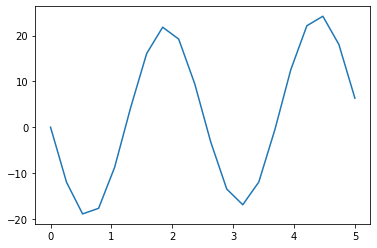

In [43]:
plt.plot(x, fx)
plt.show()

In [44]:
def error(params):
    return np.sum(np.abs(fx - f(x, params[0], params[1])))

In [45]:
from scipy.optimize import differential_evolution

bounds = [(-10, 10), (-10, 10)]
result = differential_evolution(error, bounds, seed=42)
result

     fun: 1.5130289208187264e-06
 message: 'Optimization terminated successfully.'
    nfev: 2073
     nit: 66
 success: True
       x: array([ 3. , -2.5])

In [46]:
print(f"Параметр а = {result.x[0]}, параметр в = {result.x[1]}")

Параметр а = 3.0000000000974936, параметр в = -2.4999999999792175


## Задание 4

Создайте собственную дискретную случайную величину с 20 значениями. Сгенерируйте 1000 выборок размера 50. Посчитайте среднее для каждой выборки. Постройте гистограмму распределения средних.

In [51]:
from numpy.random import choice

sample = np.random.randint(low=1, high=100, size=20)
sample

array([58, 26, 49, 60, 59, 54, 32, 12, 76, 81,  5,  1, 87, 91, 92, 55, 89,
       29, 67, 20])

In [52]:
samples_count = 1000
# Массивы для сохранения средних по выборкам

a = []

for number in range(samples_count):
    # На каждом цикле генерируем выборки разных размеров
    sample1 = choice(sample, size=50)
    # Считаем среднее по каждой выборке и добавляем в массив средних
    a.append(sample1.mean())
a[:5]

[46.36, 47.86, 48.0, 44.26, 53.38]

<function matplotlib.pyplot.show(close=None, block=None)>

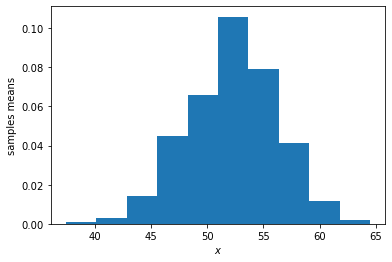

In [57]:
label_1 = 'sample of ' + str(50) + ' histogram'
plt.hist(a, density=True, label=label_1)

plt.ylabel('samples means')
plt.xlabel('$x$')
plt.show

## Задание 5

Найдите собственные значения и собственные вектора матрицы (на python и на бумаге):

In [58]:
m = np.array([[1, 4],
              [1, 1]])
print(m)

[[1 4]
 [1 1]]


In [63]:
znach, vec = np.linalg.eig(m)
print(f'Cобственные значения:\n {znach}\nCобственные вектора:\n{vec}')

Cобственные значения:
 [ 3. -1.]
Cобственные вектора:
[[ 0.89442719 -0.89442719]
 [ 0.4472136   0.4472136 ]]


Решаем систему уравнений: 
$(1-λ)(1-λ) - 4 = 0$  и  $λ^2 - 2*λ - 3 = 0$

Собственные значения:  
$λ1 = 3$ и $λ2 = -1$  

Собственный вектор №1 получаем из уравнений $-2x + 4y = 0$  и  $x - 2y = 0$:  
$\begin{pmatrix}2 \\ 1\end{pmatrix} $ 

Собственный вектор №2 получаем из уравнений $2x + 4y = 0$  и  $x + 2y = 0$:  
$\begin{pmatrix} 2 \\ -1\end{pmatrix} $